# NutriClass: Food Classification Using Nutritional Data

## Project Overview
- **Goal:** Classify food items (e.g., Meal_Type, Preparation_Method) given their nutritional data.
- **Dataset:** Provided CSV file
- **Tasks:** Data Exploration, Preprocessing, Feature Engineering, Model Selection, Evaluation, and Visualization.

In [1]:
!pip3 install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 1.3/56.8 MB 3.5 MB/s eta 0:00:16
   - -------------------------------------- 1.6/56.8 MB 2.5 MB/s eta 0:00:22
   - -------------------------------------- 2.1/56.8 MB 2.5 MB/s eta 0:00:22
   - -------------------------------------- 2.6/56.8 MB 2.6 MB/s eta 0:00:22
   -- ------------------------------------- 2.9/56.8 MB 2.3 MB/s eta 0:00:24
   -- ------------------------------------- 3.1/56.8 MB 2.2 MB/s eta 0:00:25
   -- ------------------------------------- 3.4/56.8 MB 2.0 MB/s eta 0:00:27
   -- ------------------------------------- 3.9/56.8 MB 2.1 MB/s eta 0:00:26
   --- ------------------------------------ 5.0/56.8 MB 2.4 MB/s eta 0:00:22
   ---- ----------------------------------- 6.0/56.8 MB 2.6 MB/s eta 0:00:20
   ---- ------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [8]:
# 2. Data Loading & Exploration
df = pd.read_csv(r'D:\GUVI-Projects\food_calssification\Food_Classification\Data\synthetic_food_dataset_imbalanced.csv')
print('Shape:', df.shape)
df.head()

Shape: (31700, 16)


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [9]:
# Basic info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


In [12]:
df['Meal_Type'].value_counts()

Meal_Type
snack        8001
breakfast    7970
dinner       7873
lunch        7856
Name: count, dtype: int64

### Class Distribution
We'll classify by `Meal_Type` (can change to Preparation_Method or Food_Name for more granularity).

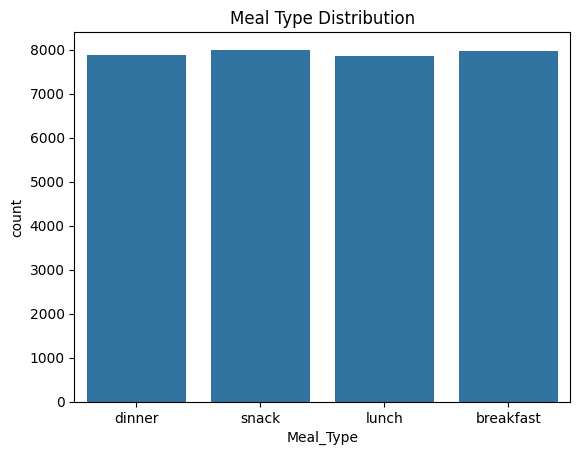

In [ ]:

sns.countplot(x='Meal_Type', data=df)
plt.title('Meal Type Distribution')
plt.show()

In [13]:
# Visualize sample rows
df.sample(5)

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
9758,184.086129,10.301394,5.804845,29.543964,2.927407,3.453994,298.326575,22.007880,72.380070,51.956403,143.704409,breakfast,raw,False,True,Sushi
22830,86.181065,0.325318,0.251904,21.014685,17.833044,4.713735,3.456118,0.000000,37.999333,91.000534,153.361739,snack,raw,True,True,Apple
21140,448.961605,25.055473,27.744742,0.000000,0.000000,0.000000,103.056268,75.956566,0.850282,61.630690,187.588768,dinner,fried,False,True,Steak
17582,249.346737,4.836790,11.071176,29.793121,17.831061,1.224048,334.629897,24.262849,78.383756,41.997521,77.277094,dinner,grilled,False,False,Donut
9234,273.618592,4.897080,17.156179,20.499148,17.958495,0.817711,321.845490,14.875989,73.392035,25.685798,78.425601,lunch,raw,False,False,Donut


## 3. Data Preprocessing
- Handle missing values
- Remove duplicates
- Outlier detection
- Normalize numerical features

In [14]:
# Missing values
print(df.isnull().sum())
# Drop rows with missing values (if any)
df = df.dropna()

Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64


In [15]:
# Remove duplicates
df = df.drop_duplicates()

In [16]:
print(df.isnull().sum())

Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64


In [17]:
df['Meal_Type'].value_counts()

Meal_Type
snack        7892
breakfast    7840
dinner       7770
lunch        7758
Name: count, dtype: int64

In [18]:
df.select_dtypes(include=np.number).columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')

In [19]:
df.columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')

In [20]:
# Outlier detection: cap values at 1.5*IQR
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

In [21]:
df.select_dtypes(include=np.number).columns

Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size'],
      dtype='object')

In [22]:
# Standardize numerical features
num_cols = df.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## 4. Feature Engineering
- PCA for dimensionality reduction
- SelectKBest for feature selection
- Encode target labels


In [23]:
# Encode categorical labels (target)
target = 'Meal_Type'  # Change as needed
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df[target])
y = df['target_encoded']
X = df[num_cols]

In [24]:
# PCA
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)
print('Explained Variance Ratio:', pca.explained_variance_ratio_)
# SelectKBest
selector = SelectKBest(score_func=f_classif, k=8)
X_sel = selector.fit_transform(X, y)

Explained Variance Ratio: [0.40413281 0.21927162 0.15920735 0.07361382 0.04161416 0.0397826
 0.01653697 0.01379355]


## 5. Model Training & Comparison
- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbors
- Support Vector Machine
- XGBoost
- Gradient Boosting


Logistic Regression classification report:
              precision    recall  f1-score   support

   breakfast       0.25      0.29      0.27      1568
      dinner       0.26      0.16      0.19      1554
       lunch       0.25      0.27      0.26      1552
       snack       0.25      0.29      0.27      1578

    accuracy                           0.25      6252
   macro avg       0.25      0.25      0.25      6252
weighted avg       0.25      0.25      0.25      6252



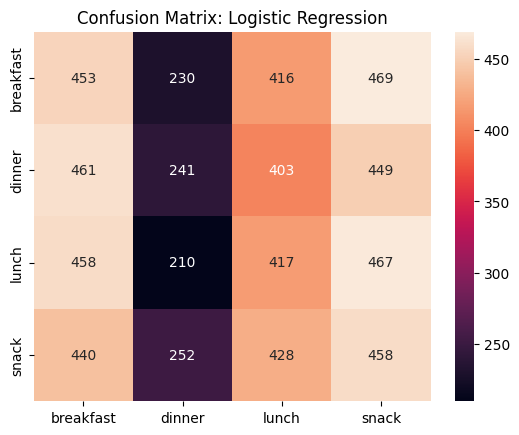


Decision Tree classification report:
              precision    recall  f1-score   support

   breakfast       0.26      0.26      0.26      1568
      dinner       0.27      0.26      0.26      1554
       lunch       0.24      0.23      0.24      1552
       snack       0.25      0.26      0.26      1578

    accuracy                           0.25      6252
   macro avg       0.25      0.25      0.25      6252
weighted avg       0.25      0.25      0.25      6252



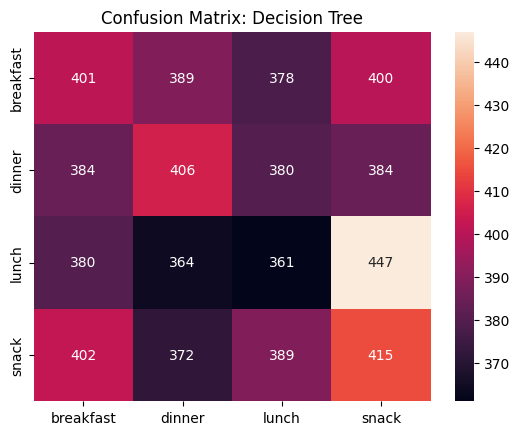


Random Forest classification report:
              precision    recall  f1-score   support

   breakfast       0.25      0.27      0.26      1568
      dinner       0.26      0.25      0.26      1554
       lunch       0.28      0.28      0.28      1552
       snack       0.26      0.24      0.25      1578

    accuracy                           0.26      6252
   macro avg       0.26      0.26      0.26      6252
weighted avg       0.26      0.26      0.26      6252



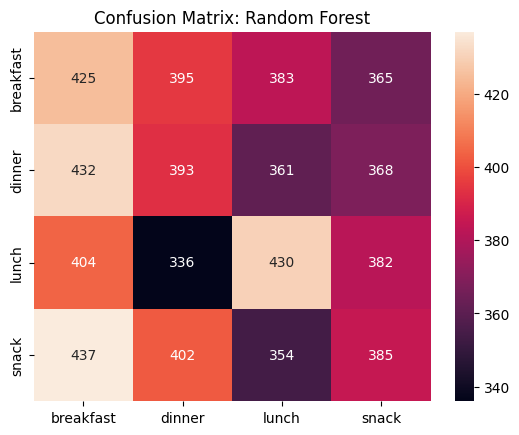


KNN classification report:
              precision    recall  f1-score   support

   breakfast       0.25      0.32      0.28      1568
      dinner       0.24      0.27      0.26      1554
       lunch       0.27      0.24      0.25      1552
       snack       0.27      0.18      0.22      1578

    accuracy                           0.25      6252
   macro avg       0.26      0.26      0.25      6252
weighted avg       0.26      0.25      0.25      6252



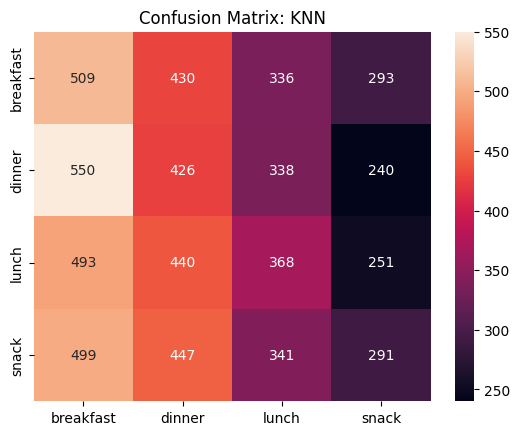


SVM classification report:
              precision    recall  f1-score   support

   breakfast       0.25      0.26      0.25      1568
      dinner       0.26      0.21      0.23      1554
       lunch       0.25      0.21      0.23      1552
       snack       0.25      0.33      0.29      1578

    accuracy                           0.25      6252
   macro avg       0.25      0.25      0.25      6252
weighted avg       0.25      0.25      0.25      6252



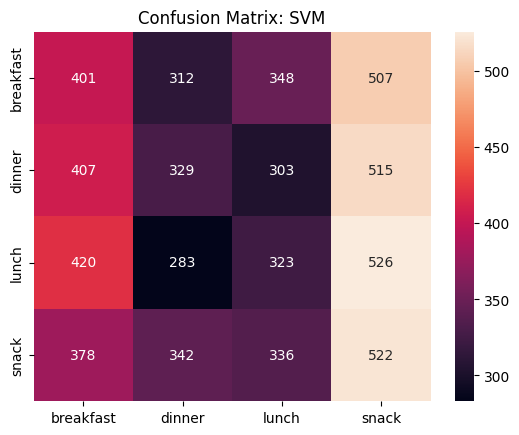


XGBoost classification report:
              precision    recall  f1-score   support

   breakfast       0.25      0.25      0.25      1568
      dinner       0.25      0.26      0.26      1554
       lunch       0.24      0.23      0.24      1552
       snack       0.25      0.25      0.25      1578

    accuracy                           0.25      6252
   macro avg       0.25      0.25      0.25      6252
weighted avg       0.25      0.25      0.25      6252



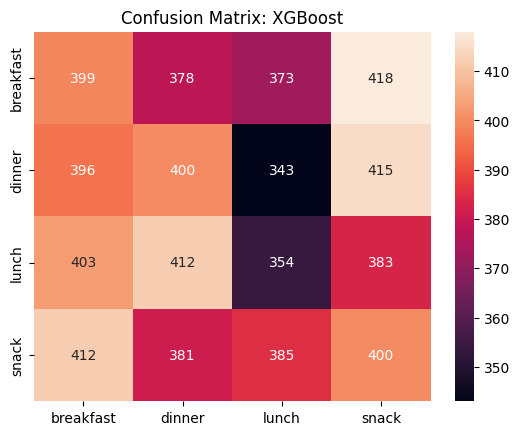


Gradient Boosting classification report:
              precision    recall  f1-score   support

   breakfast       0.24      0.26      0.25      1568
      dinner       0.23      0.22      0.23      1554
       lunch       0.25      0.25      0.25      1552
       snack       0.26      0.27      0.26      1578

    accuracy                           0.25      6252
   macro avg       0.25      0.25      0.25      6252
weighted avg       0.25      0.25      0.25      6252



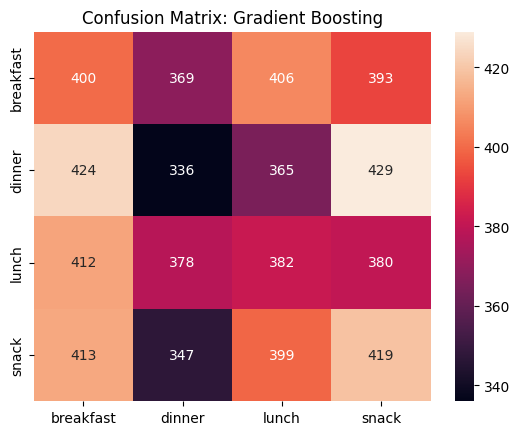

In [25]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42, stratify=y)
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = [acc, prec, rec, f1]
    print(f'\n{name} classification report:')
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()

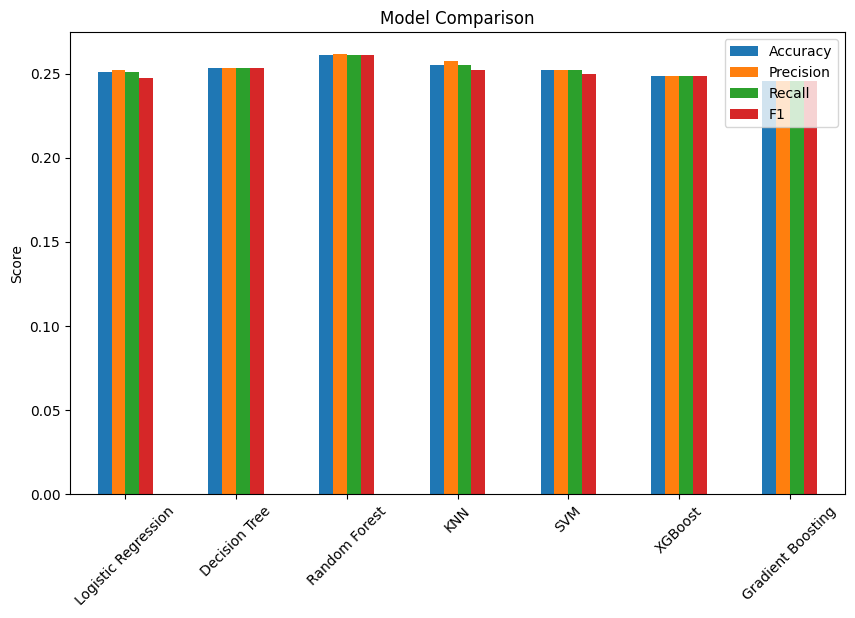

,Logistic Regression,Decision Tree,Random Forest,KNN,SVM,XGBoost,Gradient Boosting
Accuracy,0.250960,0.253199,0.261196,0.254958,0.251919,0.248401,0.245841
Precision,0.251837,0.253158,0.261428,0.257369,0.252072,0.248314,0.245581
Recall,0.250960,0.253199,0.261196,0.254958,0.251919,0.248401,0.245841
F1,0.247357,0.253134,0.261159,0.252401,0.249634,0.248274,0.245563


In [26]:
# Compare model performance
results_df = pd.DataFrame(results, index=['Accuracy','Precision','Recall','F1'])
results_df.T.plot(kind='bar', figsize=(10,6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()
results_df

## 6. Feature Importance
For tree-based models, visualize feature importance.

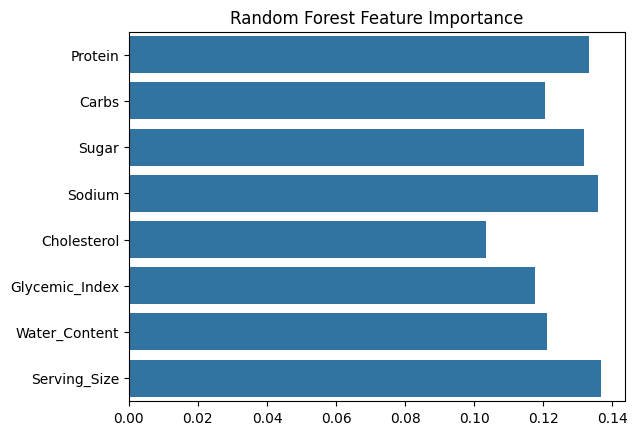

In [27]:
# Feature importance example for Random Forest
feat_imp = models['Random Forest'].feature_importances_
sns.barplot(x=feat_imp, y=np.array(num_cols)[selector.get_support()])
plt.title('Random Forest Feature Importance')
plt.show()

# 7. Insights & Recommendations
- Model with highest accuracy/F1: `results_df.idxmax(axis=1)['F1']`
- Feature selection and PCA help reduce noise and improve results.
- Tree ensembles (Random Forest, XGBoost, Gradient Boosting) likely outperform linear models.
- Recommend further tuning on larger datasets.

In [28]:
!pip3 install streamlit-authenticator



   ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
   ---------------------------------------- 3.4/3.4 MB 25.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 28.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
